# *German credit data* - analysis

## Libraries import

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read data

#### read data online

In [3]:
data = pd.read_csv("https://www.mldata.io/download-csv-weka/german_credit_data/")

In [4]:
atributes = pd.read_csv("https://www.mldata.io/download-attributes/german_credit_data/")

## Intro data analysis

In [5]:
data.telephone = data.telephone.map({"A191": 0, "A192": 1})
data.foreign_worker = data.foreign_worker.map({"A201": 1, "A202": 0})

Several variables underwent type change due to their binariness

#### Conclusion

Without missing data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_account_status    1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
credit_amount              1000 non-null float64
savings                    1000 non-null object
present_employment         1000 non-null object
installment_rate           1000 non-null float64
personal                   1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null float64
property                   1000 non-null object
age                        1000 non-null float64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
existing_credits           1000 non-null float64
job                        1000 non-null object
dependents                 1000 non-null int64
telephone                  

#### Conclusions

1. There is only 3.7% workers, who work in foreign country
2. Dataset is not balanced (70% 'yes' answers)
3. Credit_amount has significant outliers (check boxplots below)

In [7]:
num_var = ['duration', 'credit_amount', 'age', 'existing_credits', 'dependents', 'telephone', 'foreign_worker']
data[num_var].describe()

,duration,credit_amount,age,existing_credits,dependents,telephone,foreign_worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000,1.407000,1.155000,0.404000,0.963000
std,12.058814,2822.736876,11.375469,0.577654,0.362086,0.490943,0.188856
min,4.000000,250.000000,19.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,1365.500000,27.000000,1.000000,1.000000,0.000000,1.000000
50%,18.000000,2319.500000,33.000000,1.000000,1.000000,0.000000,1.000000
75%,24.000000,3972.250000,42.000000,2.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,75.000000,4.000000,2.000000,1.000000,1.000000


In [8]:
data.customer_type.replace([1,2], [1,0], inplace=True)
data.customer_type.value_counts()

1    700
0    300
Name: customer_type, dtype: int64

## Map variables

In [9]:
data.job = data.job.map({"A171" : "unemployed/unskilled","A172": "unskilled-resident", "A173": "skilled_employee","A174": "management/self-employed"})
data.housing = data.housing.map({'A151' : 'rent', 'A152' : 'own', 'A153' : 'free'})
data.purpose = data.purpose.map({'A40': 'new car', 'A41': 'used car', 'A42': 'furniture/equipment', 'A43': 'radio/television', 'A44': 'domestic appliances', 'A45': 'repairs', 'A46': 'education', 'A47': 'vacation', 'A48':'retraining',
'A49': 'business', 'A410': 'others'})
data.other_debtors = data.other_debtors.map({'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'})
data.other_installment_plans = data.other_installment_plans.map({'A141': 'bank', 'A142': 'stores', 'A143': 'none'})

In [10]:
data.head(10)

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,radio/television,1169.0,A65,A75,4.0,A93,none,...,A121,67.0,none,own,2.0,skilled_employee,1,1,1,1
1,A12,48,A32,radio/television,5951.0,A61,A73,2.0,A92,none,...,A121,22.0,none,own,1.0,skilled_employee,1,0,1,0
2,A14,12,A34,education,2096.0,A61,A74,2.0,A93,none,...,A121,49.0,none,own,1.0,unskilled-resident,2,0,1,1
3,A11,42,A32,furniture/equipment,7882.0,A61,A74,2.0,A93,guarantor,...,A122,45.0,none,free,1.0,skilled_employee,2,0,1,1
4,A11,24,A33,new car,4870.0,A61,A73,3.0,A93,none,...,A124,53.0,none,free,2.0,skilled_employee,2,0,1,0
5,A14,36,A32,education,9055.0,A65,A73,2.0,A93,none,...,A124,35.0,none,free,1.0,unskilled-resident,2,1,1,1
6,A14,24,A32,furniture/equipment,2835.0,A63,A75,3.0,A93,none,...,A122,53.0,none,own,1.0,skilled_employee,1,0,1,1
7,A12,36,A32,used car,6948.0,A61,A73,2.0,A93,none,...,A123,35.0,none,rent,1.0,management/self-employed,1,1,1,1
8,A14,12,A32,radio/television,3059.0,A64,A74,2.0,A91,none,...,A121,61.0,none,own,1.0,unskilled-resident,1,0,1,1
9,A12,30,A34,new car,5234.0,A61,A71,4.0,A94,none,...,A123,28.0,none,own,2.0,management/self-employed,1,0,1,0


## Correlation matrix

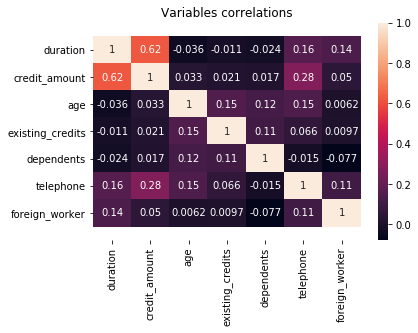

In [11]:
corr=data[num_var].iloc[:,:].corr()

ax=sns.heatmap(corr,
               xticklabels=corr.columns,
               yticklabels=corr.columns, annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Variables correlations')
plt.show()

#### Conclusions
1. Credit amount and duration are strongly correlated (as expected)

## Advance analysis

### Age distribution

#### Conclusions 
1. Credit is mostly taken by 30-year-olds *(plot 1)*
2. Reliabilty doesn't depend on the client's age  *(plot 2)*

Text(0.5, 1.0, 'Age distribution')

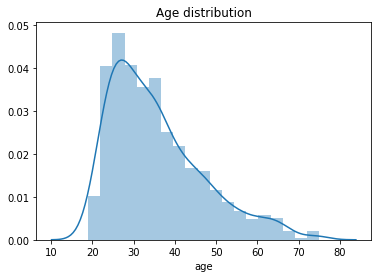

In [12]:
sns.distplot(data.age)
plt.title("Age distribution")

Text(0.5, 1.0, 'Age distribution by customer type')

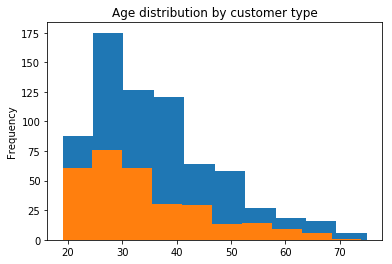

In [13]:
ax1 = data[data.customer_type==1].age.plot(kind='hist')
ax2 = data[data.customer_type==0].age.plot(kind='hist')
plt.title('Age distribution by customer type')

### Duration distribution

#### Conclusions 
1. The distribution is irregular *(plot 1)*
2. Credits were most frequently taken for a period of 12 months *(plot 1)*
3. Credits taken for a shorter time were paid back eariler *(plot 2)*

Text(0.5, 1.0, 'Duration distribution')

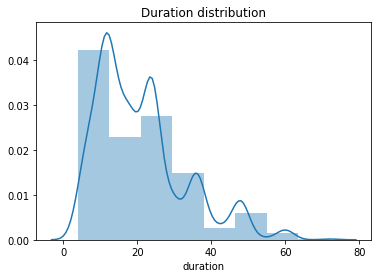

In [14]:
sns.distplot(data.duration, bins=8)
plt.title("Duration distribution")

Text(0.5, 1.0, 'Duration distribution by customer type')

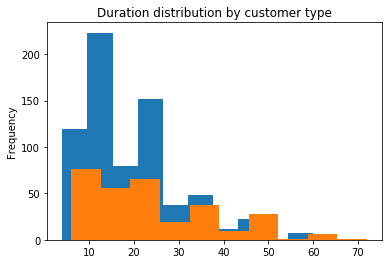

In [15]:
ax1 = data[data.customer_type==1].duration.plot(kind='hist', bins=10)
ax2 = data[data.customer_type==0].duration.plot(kind='hist', bins=10)
plt.title('Duration distribution by customer type')

### Credit amounts

#### Conclusions 
1. Credit amount and duration are strongly correlated (as expected) *(plot 1)*
2. The higher taken credits were, the earlier they were paid back *(plot 3)*

Text(0.5, 1.0, 'Credit amount - duration')

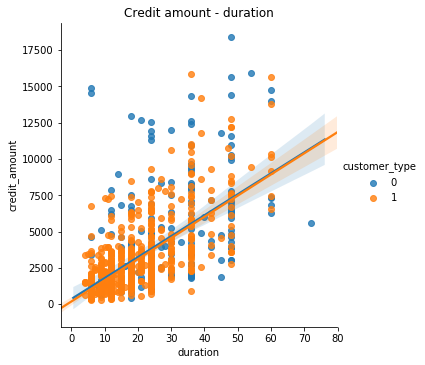

In [16]:
sns.lmplot(y = 'credit_amount', x = 'duration', hue='customer_type', data = data)
plt.title("Credit amount - duration")

Text(0.5, 1.0, 'Credit amount distribution')

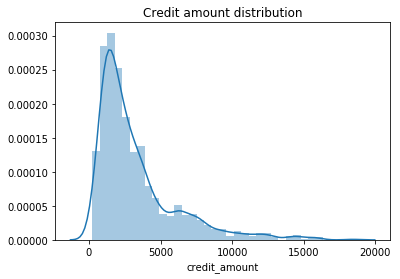

In [17]:
sns.distplot(data.credit_amount)
plt.title("Credit amount distribution")

Text(0.5, 1.0, 'Duration distribution by customer type')

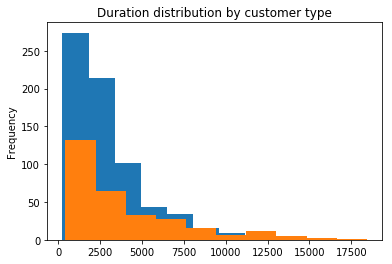

In [18]:
ax1 = data[data.customer_type==1].credit_amount.plot(kind='hist')
ax2 = data[data.customer_type==0].credit_amount.plot(kind='hist')
plt.title('Duration distribution by customer type')

## Needed functions

In [19]:
def plot_countplot(col_name: str, y_lim: int):
    fig, ax =plt.subplots(1,2)
    sns.countplot(x=col_name, data=data[data.customer_type==0], order=data[col_name].value_counts().index, ax=ax[0])
    sns.countplot(x=col_name, data=data[data.customer_type==1], order=data[col_name].value_counts().index, ax=ax[1])
    fig.show()
    plt.setp(ax, ylim=[0, y_lim])
    plt.title(col_name + " (No/Yes)")
    plt.show()
    
def cal_mean_val(col_name: str):
    return data.groupby(col_name)["customer_type"].mean()

### Personal info Analysis

#### Conclusions 
1. There has been no single female clients
2. *A91* doesn't strictly follow 70/30 distribution rule

#### Personal Marital Status and Sex 
1. *A91* : male : divorced/separated
2. *A92* : female : divorced/separated/married 
3. *A93* : male : single 
4. *A94* : male : married/widowed
5. *A95* : female : single

In [20]:
male_divsep = data[data.personal=='A91']
female_divsepmarr = data[data.personal=='A92']
male_single = data[data.personal=='A93']
male_marrwid = data[data.personal=='A94']
female_single = data[data.personal=='A95']

In [21]:
female_single.customer_type.value_counts()

Series([], Name: customer_type, dtype: int64)

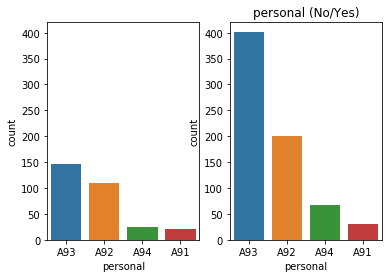

In [22]:
plot_countplot('personal', 420)

In [23]:
cal_mean_val('personal')

personal
A91    0.600000
A92    0.648387
A93    0.733577
A94    0.728261
Name: customer_type, dtype: float64

### Credit history

#### Conclusions 
1. Contrary to expectations, clients, who have paid previous credits duly, don't do so now - and vice-versa

1. *A30*: no credits taken/ all credits paid back duly 
2. *A31*: all credits at this bank paid back duly 
3. *A32*: existing credits paid back duly till now 
4. *A33*: delay in paying off in the past 
5. *A34* : critical account/ other credits existing (not at this bank)

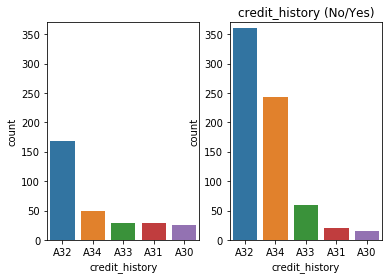

In [24]:
plot_countplot('credit_history', 370)

In [25]:
cal_mean_val('credit_history')

credit_history
A30    0.375000
A31    0.428571
A32    0.681132
A33    0.681818
A34    0.829352
Name: customer_type, dtype: float64

### Checking account status

#### Conclusions
1. Clients who didn't possess a checking account, or had significant salary assigned to it were most likely to pay the credit.
2. Probability of paying credit or not was most likely even for clients with < 200 DM

1. *A14*: no checking account  
2. *A11*: < 0 DM  
3. *A12*: 0 <= x < 200 DM  
4. *A13*: >= 200 DM   

**salary assignments for at least 1 year**

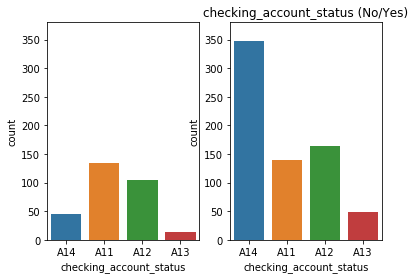

In [26]:
plot_countplot('checking_account_status', 380)

In [27]:
cal_mean_val('checking_account_status')

checking_account_status
A11    0.507299
A12    0.609665
A13    0.777778
A14    0.883249
Name: customer_type, dtype: float64

### Purpose

#### Conclusions
1. What's interesting used car credit was much more likely to be paid than new car credit.
2. 'Others' least likely to get paid(hard to tell the reason)
3. Business, education less likely to get paid(maybe struggles of beginning a new life?)

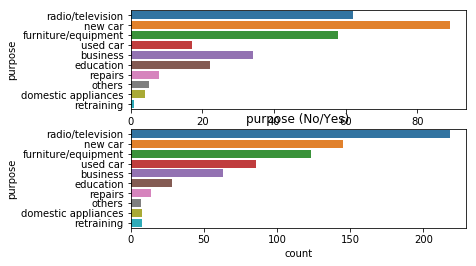

In [28]:
col_name='purpose'
fig, ax =plt.subplots(2,1)
sns.countplot(y=col_name, data=data[data.customer_type==0], order=data[col_name].value_counts().index, ax=ax[0])
sns.countplot(y=col_name, data=data[data.customer_type==1], order=data[col_name].value_counts().index, ax=ax[1])
fig.show()
plt.title(col_name + " (No/Yes)")
plt.show()

In [29]:
cal_mean_val('purpose')

purpose
business               0.649485
domestic appliances    0.666667
education              0.560000
furniture/equipment    0.679558
new car                0.619658
others                 0.583333
radio/television       0.778571
repairs                0.636364
retraining             0.888889
used car               0.834951
Name: customer_type, dtype: float64

### Savings

#### Conclusions
1. The wealthier the client the probability of paying the credit is higher.
2. Also clients with unknown savings were most likely to pay it.

1. *A61*: < 100 DM  
2. *A62*: 100 <= x < 500 DM  
3. *A63*: 500 <= x < 1000 DM  
4. *A64*: >= 1000 DM  
5. *A65*: unknown/ no savings account

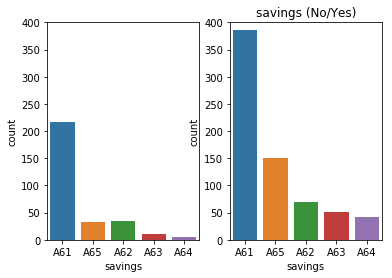

In [30]:
plot_countplot('savings', 400)

In [31]:
cal_mean_val('savings')

savings
A61    0.640133
A62    0.669903
A63    0.825397
A64    0.875000
A65    0.825137
Name: customer_type, dtype: float64

### Present employment

#### Conclusions
1. What is installment rate exactly?

1. *A71*: unemployed  
2. *A72*: < 1 year  
3. *A73*: 1 <= x < 4 years  
4. *A74*: 4 <= x < 7 years  
5. *A75*: .. >= 7 years

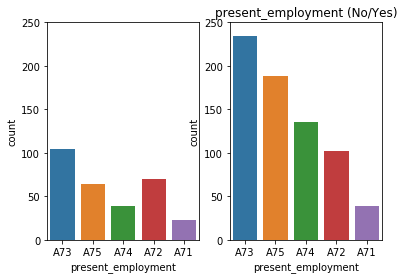

In [32]:
plot_countplot('present_employment', 250)

In [33]:
cal_mean_val('present_employment')

present_employment
A71    0.629032
A72    0.593023
A73    0.693215
A74    0.775862
A75    0.747036
Name: customer_type, dtype: float64

### Installment rate


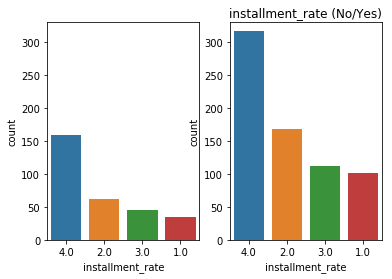

In [34]:
plot_countplot('installment_rate', 330)

In [35]:
cal_mean_val('installment_rate')

installment_rate
1.0    0.750000
2.0    0.731602
3.0    0.713376
4.0    0.665966
Name: customer_type, dtype: float64

### Other debtors

#### Conclusions
1. Better clients had a guarantor, worse had a co-applicant

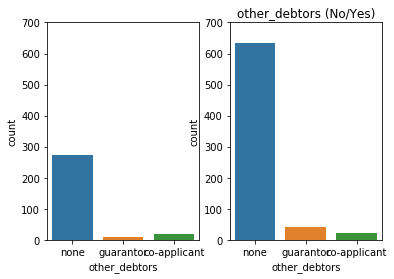

In [36]:
plot_countplot('other_debtors', 700)

In [37]:
cal_mean_val('other_debtors')

other_debtors
co-applicant    0.560976
guarantor       0.807692
none            0.700110
Name: customer_type, dtype: float64

### Property

#### Conclusions

People pay duly if they have a property

1. *A121*: real estate
2. *A122*: if not A121: building society savings agreement/ life insurance
3. *A123*: if not A121/A122 : car or other, not in attribute 6
4. *A124*: unknown / no property

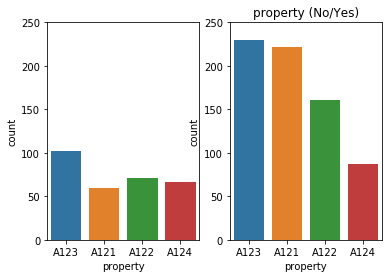

In [38]:
plot_countplot('property', 250)

In [39]:
cal_mean_val('property')

property
A121    0.787234
A122    0.693966
A123    0.692771
A124    0.564935
Name: customer_type, dtype: float64

### Foreign worker



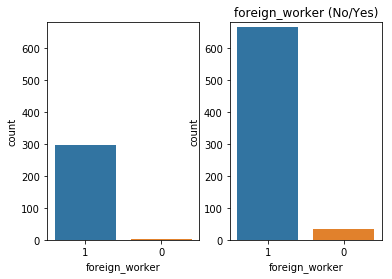

In [40]:
plot_countplot('foreign_worker', 680)

In [41]:
cal_mean_val('foreign_worker')

foreign_worker
0    0.891892
1    0.692627
Name: customer_type, dtype: float64

### Other installment plans

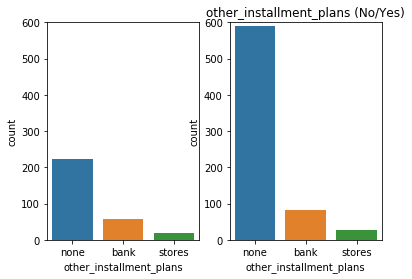

In [42]:
plot_countplot('other_installment_plans', 600)

In [43]:
cal_mean_val('other_installment_plans')

other_installment_plans
bank      0.589928
none      0.724816
stores    0.595745
Name: customer_type, dtype: float64

### Housing

#### Conclusion
1. People, who have own house is more cases pay credit

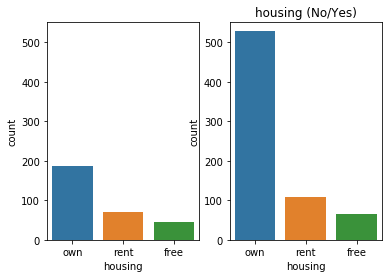

In [44]:
plot_countplot('housing', 550)

In [45]:
cal_mean_val('housing')

housing
free    0.592593
own     0.739130
rent    0.608939
Name: customer_type, dtype: float64

### Jobs

#### Conclusions
1. Nothing special

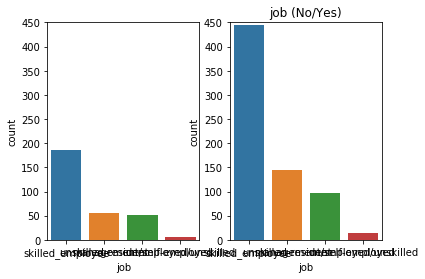

In [46]:
plot_countplot('job', 450)

In [47]:
cal_mean_val('job')

job
management/self-employed    0.655405
skilled_employee            0.704762
unemployed/unskilled        0.681818
unskilled-resident          0.720000
Name: customer_type, dtype: float64

### Exisitng credits 

number of existing credits at this bank

#### Conclusions
1. Nothing special

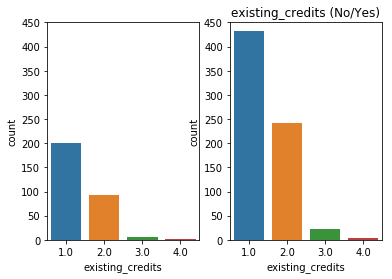

In [48]:
plot_countplot('existing_credits', 450)

In [49]:
cal_mean_val('existing_credits')

existing_credits
1.0    0.684044
2.0    0.723724
3.0    0.785714
4.0    0.666667
Name: customer_type, dtype: float64

### Dependents

#### Conclusions
1. Nothing special

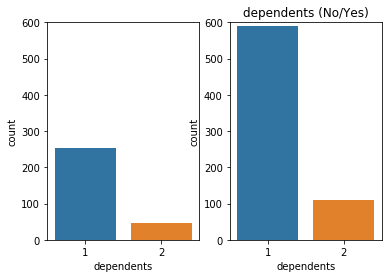

In [50]:
plot_countplot('dependents', 600)

In [51]:
cal_mean_val('dependents')

dependents
1    0.699408
2    0.703226
Name: customer_type, dtype: float64

### Telephone

#### Conclusions
1. Nothing special

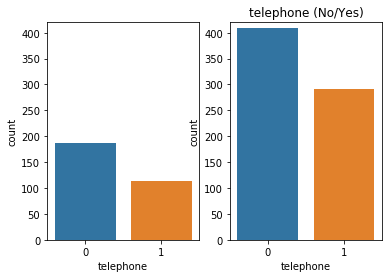

In [52]:
plot_countplot('telephone', 420)

In [53]:
cal_mean_val('telephone')

telephone
0    0.686242
1    0.720297
Name: customer_type, dtype: float64

### Present residence 

#### Conclusion
Nothing special

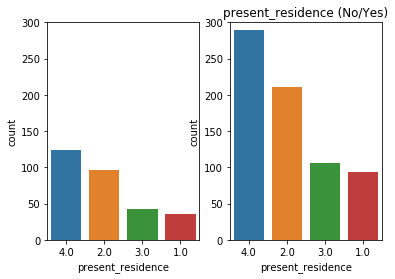

In [54]:
plot_countplot('present_residence', 300)

In [55]:
cal_mean_val('present_residence')

present_residence
1.0    0.723077
2.0    0.685065
3.0    0.711409
4.0    0.699758
Name: customer_type, dtype: float64

## Preparing data for modeling

### Variable types

#### Continuous  
- duration
- credit_amount
- age
- installment_rate
- present_residence
- dependents
- existing_credits

#### Nominal  
- credit_history
- purpose
- personal
- other_debtors
- property
- other_installment_plans
- housing
- job
- telephone
- foreign_worker
- present_employment

#### Ordinal
- checking_account_status
- savings  

in both cases amounts can be put in order, but having no account should be treated as different variable during encoding

In [56]:
### backup data frame
data_old = data
from sklearn import preprocessing
import category_encoders as ce

### Handling outliers

As said earlier, only observable outliers can appear in credit_ammount column. Let's take a closer look.

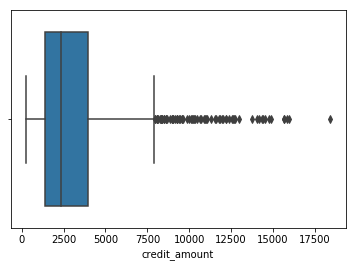

In [57]:
sns.boxplot(x = data['credit_amount'])

In [58]:
data_out = data[data.credit_amount>8000]
data_out.customer_type.mean()

0.45714285714285713

In [59]:
data_out = data[data.credit_amount>10000]
data_out.customer_type.mean()

0.4

In [60]:
data_out = data[data.credit_amount>13000]
data_out.customer_type.mean()

0.3076923076923077

so the higher as outliers go the less likely it is that credit was paid

In [61]:
data.customer_type.mean()

0.7

In [62]:
len(data)

1000

In [63]:
data[data.credit_amount<10000].customer_type.mean()

0.7125

In [64]:
len(data[data.credit_amount<10000])

960

Still these outliers don't differentiate distribution of customer_type that much, so keeping them might provide some valuable information and deffinately won't affect modeling badly.

### Adding gender

In [66]:
data['sex'] = data.personal.apply(lambda x: 1 if x in ['A91', 'A93', 'A94'] else 0) # male = 1, female = 0

### Adding info about account presence

In [67]:
data['checking_account_exists'] = np.where(data['checking_account_status']=='A14', 0, 1)
data['savings_account_exists'] = np.where(data['savings']=='A65', 0, 1)

### Dividing data into train and test set

In [73]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('customer_type', axis=1), data.customer_type, test_size=0.3)

### Encoding function

In [120]:
import category_encoders as ce
class Error(Exception):
    pass
class NonMatchingLengthsError(Error):
    pass

In [126]:
def multiEnc(df_train, df_test, target_train ,cols, encodings):
    """
    Lista znaków do "encodings":
        d - backward difference
        n - base N
        b - binary
        c - cat boost
        # - hashing
        h - helmert
        j - James-Stein
        l - leave one out
        m - m-estimate
        1 - one-hot
        o - ordinal
        p - polynomial
        s - sum coding
        t - target encoding
        w - weight of evidence
    """
    ce_map = {"d": ce.backward_difference.BackwardDifferenceEncoder,
             "n": ce.basen.BaseNEncoder,
             "b": ce.binary.BinaryEncoder,
             "c": ce.cat_boost.CatBoostEncoder,
             "#": ce.hashing.HashingEncoder,
             "h": ce.helmert.HelmertEncoder,
             "j": ce.james_stein.JamesSteinEncoder,
             "l": ce.leave_one_out.LeaveOneOutEncoder,
             "m": ce.m_estimate.MEstimateEncoder,
             "1": ce.one_hot.OneHotEncoder,
             "o": ce.ordinal.OrdinalEncoder,
             "p": ce.polynomial.PolynomialEncoder,
             "s": ce.sum_coding.SumEncoder,
             "t": ce.target_encoder.TargetEncoder,
             "w": ce.woe.WOEEncoder}
    try:
        if len(cols)!=len(encodings):
            raise(NonMatchingLengthsError)
    except NonMatchingLengthsError:
        print("Lengths do not match")
        return None
    e=0
    for c in cols:
        if df_train[c].dtypes=='object':
            enc=ce_map[encodings[e]](cols=c)
            enc=enc.fit(df_train, target_train)
            df_train=enc.transform(df_train)
            df_test=enc.transform(df_test)
        e=e+1
    return (df_train, df_test)

### Example of use  
input(explanations):
- cols - specified columns to encode
- encodings - types of encodings in the same order as columns in c

In [122]:
df_train, df_test = multiEnc(X_train, X_test, y_train ,['job'], ['1'])

In [123]:
df_train.columns

Index(['checking_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment', 'installment_rate',
       'personal', 'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits', 'job_1',
       'job_2', 'job_3', 'job_4', 'dependents', 'telephone', 'foreign_worker',
       'sex', 'checking_account_exists', 'savings_account_exists'],
      dtype='object')

In [125]:
df_train

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,job_1,job_2,job_3,job_4,dependents,telephone,foreign_worker,sex,checking_account_exists,savings_account_exists
168,A14,24,A32,furniture/equipment,3972.0,A61,A74,2.0,A92,none,...,1,0,0,0,1,1,1,0,0,1
726,A14,15,A34,radio/television,1316.0,A63,A73,2.0,A94,none,...,0,1,0,0,1,0,1,1,0,1
94,A12,12,A32,new car,1318.0,A64,A75,4.0,A93,none,...,1,0,0,0,1,1,1,1,1,1
103,A12,9,A34,furniture/equipment,1919.0,A61,A74,4.0,A93,none,...,1,0,0,0,1,1,1,1,1,1
347,A12,24,A32,radio/television,3758.0,A63,A71,1.0,A92,none,...,0,0,1,0,1,0,1,0,1,1
544,A14,12,A34,new car,1255.0,A61,A75,4.0,A93,none,...,0,1,0,0,1,0,1,1,0,1
342,A12,18,A32,radio/television,3213.0,A63,A72,1.0,A94,none,...,1,0,0,0,1,0,1,1,1,1
826,A11,18,A34,new car,3966.0,A61,A75,1.0,A92,none,...,1,0,0,0,1,1,1,0,1,1
143,A11,18,A32,furniture/equipment,2462.0,A61,A73,2.0,A93,none,...,1,0,0,0,1,0,1,1,1,1
971,A14,24,A32,new car,7393.0,A61,A73,1.0,A93,none,...,0,1,0,0,2,0,1,1,0,1
